# A Telecom Problem

You work at a Telecom company that is trying to build a prediction of whether customers will or will not churn. Their problem is that they don't have enough account managers to apply to everyone's account; they need to prioritize high-risk accounts so that they can increase their margins! They want you to create a machine learning model based on historical that will help predict which customers will churn (stop buying the rooms) so that they can correctly assign the customers most at risk to churn an account manager.

Create a classification algorithm that will help classify whether or not a customer churned. Your output should both be the predicted outcome [`.predict()`] and the probability of that outcome [`.predict_proba()`]. Test your model and report its results on historical data. Then apply your model to  incoming data for future customers to predict which customers will churn and assign them an account manager.

The historical data is saved as `historical_customers.csv`. Because you're a consultant here, there is no data dictionary to define the what data is captured in your columns or how it is captured. But the names of the features should be clear enough. 
    
Once you've created the model and evaluated it, test out the model on some new data that your hospitality company has provided, saved under `new_customers.csv`. Which new customers are most likely to churn given this data? Assuming we can't keep everyone or hire extra agents, which accounts would you prioritize and why? 

In [1]:
#Import your libraries, data
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [2]:
#import the data
historical_customers = pd.read_csv('./data/historical_customers.csv')
#show the info
historical_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6712 non-null   object 
 1   gender            6712 non-null   object 
 2   SeniorCitizen     6712 non-null   int64  
 3   Partner           6712 non-null   object 
 4   Dependents        6712 non-null   object 
 5   tenure            6712 non-null   int64  
 6   PhoneService      6712 non-null   object 
 7   MultipleLines     6712 non-null   object 
 8   InternetService   6712 non-null   object 
 9   OnlineSecurity    6712 non-null   object 
 10  OnlineBackup      6712 non-null   object 
 11  DeviceProtection  6712 non-null   object 
 12  TechSupport       6712 non-null   object 
 13  StreamingTV       6712 non-null   object 
 14  StreamingMovies   6712 non-null   object 
 15  Contract          6712 non-null   object 
 16  PaperlessBilling  6712 non-null   object 


In [3]:
historical_customers.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
#profile data types


========================= customerID =========================
UNIQUE VALUES:  6712
5546-BYZSM    1
8041-TMEID    1
2826-DXLQO    1
0068-FIGTF    1
0562-KBDVM    1
             ..
2270-CHBFN    1
6670-MFRPK    1
4625-EWPTF    1
5949-XIKAE    1
6823-SIDFQ    1
Name: customerID, Length: 6712, dtype: int64
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

========================= gender =========================
UNIQUE VALUES:  2
Male      3391
Female    3321
Name: gender, dtype: int64
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

========================= SeniorCitizen =========================
count    6712.000000
mean        0.161651
std         0.368158
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

========================= Partner =========================
UNIQUE VALUES:  2
No     3466
Yes    3246


In [4]:
#A number of TotalCharges are just an empty space - let's just drop those (di minimus rule)
historical_customers = historical_customers[historical_customers['TotalCharges'] != ' ']
#also, it's mixed data type, so recast it to a float!
historical_customers['TotalCharges'] = historical_customers['TotalCharges'].apply(lambda x: float(x))
hostorical

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Dummy/Binarize your features to best capture impact and importance, and do some EDA. Don't forget missing data!

In [5]:
categorical_columns = list(historical_customers.select_dtypes(include=['object']).columns)
categorical_columns = categorical_columns[1:-1]
categorical_columns


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [6]:
# binarize "churn"
#historical_customers['Churn'] = historical_customers['Churn'].map({'No':0,'Yes':1})
historical_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#dummies
selected_columns = ['PaymentMethod', 'Contract', 'StreamingMovies', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'InternetService', 'MultipleLines', 'StreamingTV' ]
hc_dummies = pd.get_dummies(historical_customers,columns = selected_columns, drop_first = True)
hc_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,6702.0,0.161892,0.368379,0.00,0.0000,0.00,0.0000,1.00
tenure,6702.0,32.383318,24.554379,1.00,9.0000,29.00,55.0000,72.00
MonthlyCharges,6702.0,64.714511,30.125021,18.25,35.4000,70.35,89.9000,118.75
TotalCharges,6702.0,2278.894979,2267.175151,18.80,399.4875,1391.40,3778.6875,8684.80
PaymentMethod_Credit card (automatic),6702.0,0.216950,0.412199,0.00,0.0000,0.00,0.0000,1.00
PaymentMethod_Electronic check,6702.0,0.336318,0.472484,0.00,0.0000,0.00,1.0000,1.00
PaymentMethod_Mailed check,6702.0,0.228439,0.419858,0.00,0.0000,0.00,0.0000,1.00
Contract_One year,6702.0,0.210236,0.407506,0.00,0.0000,0.00,0.0000,1.00
Contract_Two year,6702.0,0.239779,0.426980,0.00,0.0000,0.00,0.0000,1.00
StreamingMovies_No internet service,6702.0,0.217995,0.412915,0.00,0.0000,0.00,0.0000,1.00


In [8]:
binary_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
# binarize
hc_dummies[binary_columns] = hc_dummies[binary_columns].apply(lambda x: x.map({'No':0,'Yes':1}))
hc_dummies['gender'] = hc_dummies['gender'].map({'Female':0,'Male':1})

In [19]:
#dummies


customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
PaperlessBilling
MonthlyCharges
TotalCharges
Churn
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
Contract_Month-to-month
Contract_One year
Contract_Two year
StreamingMovies_No
StreamingMovies_Yes
TechSupport_No
TechSupport_Yes
DeviceProtection_No
DeviceProtection_Yes
OnlineBackup_No
OnlineBackup_Yes
OnlineSecurity_No
OnlineSecurity_Yes
InternetService_DSL
InternetService_Fiber optic
InternetService_No
MultipleLines_No
MultipleLines_Yes
StreamingTV_No
StreamingTV_Yes


In [113]:
#Binarize binary class features


#describe the first 45 features of the dataframe now -- there are a lot of features after dummies and binaries!
hc_dummies['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
6707    0
6708    1
6709    0
6710    0
6711    0
Name: Churn, Length: 6702, dtype: int64

In [9]:
plt.rcParams["figure.figsize"] = (10,10)

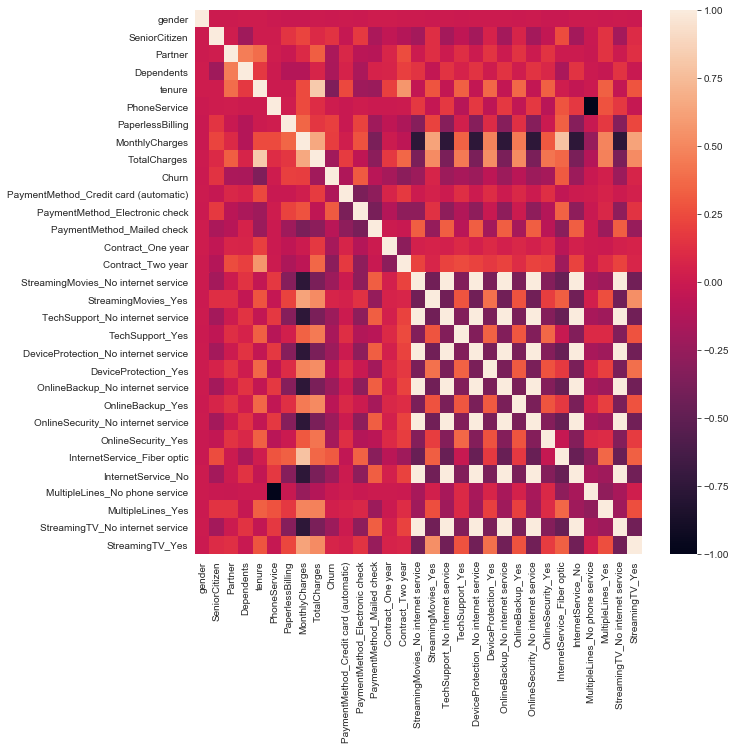

In [10]:
sns.heatmap(hc_dummies.corr())

In [11]:
#Check out your data using at least 4 visualizations
plt.rcParams["figure.figsize"] = (5,5)


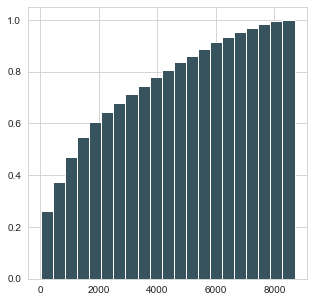

In [12]:
plt.hist(hc_dummies['TotalCharges'],density = True,cumulative = True, bins = 'scott');

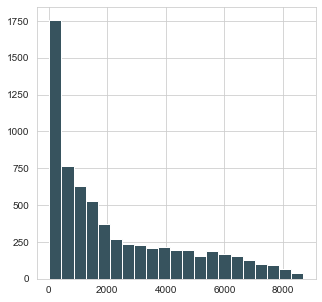

In [13]:
plt.hist(hc_dummies['TotalCharges'],bins = 'scott');

[4930, 1772]


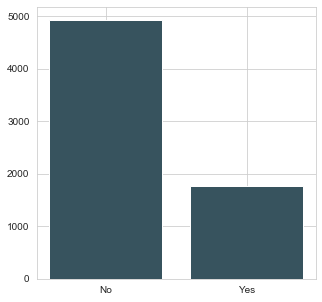

In [14]:
X = ['No','Yes']
Y = [hc_dummies['Churn'][hc_dummies['Churn'] == 0].count(),hc_dummies['Churn'][hc_dummies['Churn'] == 1].count()]
print(Y)
plt.bar(X,Y);

In [26]:
_plot_pareto_by(customers, 'Churn', 'tenure')

### How do you choose which features to include?
 -- We want the most linearly related to our churn; and then the most independent from that (by a pearson linear assumption). We can also use a dogplot.

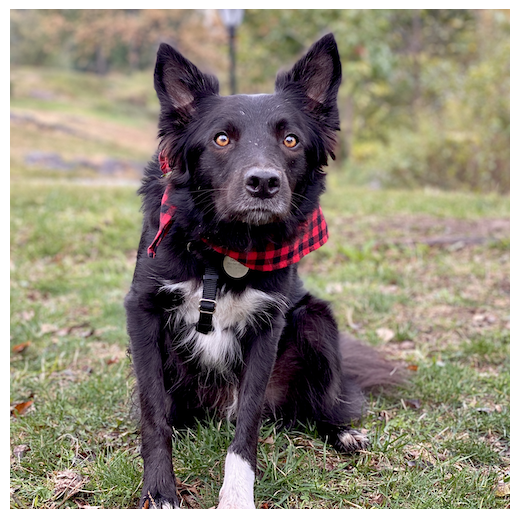

In [134]:
sns.dogplot(hc_dummies.Churn)

In [20]:
hc_dummies.corr()['Churn']
# seems like tenure with coefficient of -0.35
#hc_dummies.corr()

gender                                  -0.007616
SeniorCitizen                            0.147997
Partner                                 -0.149534
Dependents                              -0.161439
tenure                                  -0.354452
PhoneService                             0.011202
PaperlessBilling                         0.197125
MonthlyCharges                           0.193559
TotalCharges                            -0.199338
Churn                                    1.000000
PaymentMethod_Credit card (automatic)   -0.138262
PaymentMethod_Electronic check           0.305102
PaymentMethod_Mailed check              -0.091705
Contract_One year                       -0.178964
Contract_Two year                       -0.301833
StreamingMovies_No internet service     -0.226400
StreamingMovies_Yes                      0.062823
TechSupport_No internet service         -0.226400
TechSupport_Yes                         -0.166545
DeviceProtection_No internet service    -0.226400


## Train Test Split

In [21]:
#Define features
selected_features = ['tenure','gender',
                     'PhoneService',
                     'PaperlessBilling',
                     'PaymentMethod_Credit card (automatic)',
                     'PaymentMethod_Electronic check',
                     'PaymentMethod_Mailed check'
                    ]
X = hc_dummies[selected_features]
y = hc_dummies['Churn']

In [22]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)

## Create the Logistic Regression Model

In [25]:
#instantiate
from sklearn.linear_model import LogisticRegression #GLM
from sklearn.model_selection import train_test_split

#instatiate
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#fit
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#predict
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

In [30]:
logreg.score(X_test, y_test)

0.7866732968672302

In [34]:
#score accuracy


0.7774463007159904

In [31]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      1491
           1       0.64      0.39      0.49       520

    accuracy                           0.79      2011
   macro avg       0.73      0.66      0.68      2011
weighted avg       0.77      0.79      0.77      2011



In [35]:
#classification report


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1233
           1       0.61      0.45      0.51       443

    accuracy                           0.78      1676
   macro avg       0.71      0.67      0.69      1676
weighted avg       0.76      0.78      0.77      1676



## Evaluate the results

Our model actually performs pretty poorly on predicting whether or not someone will churn. But let's keep working forward!

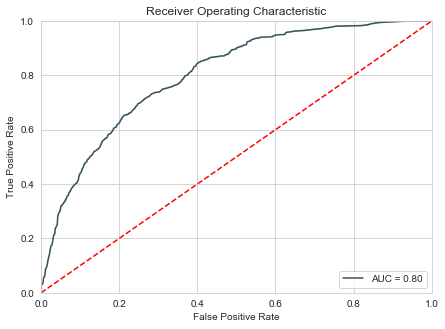

In [36]:
#Your client just sent you a curveball email - there's a pun here... wait for it. 
#Their standard is to use the area under the reciever operating characteristic curve to evaluate models
#You'll need to find the documentation and show the auc... and be able to explain it. 

#first we need the predicted probabilities


#then we define false|true positive rates


#We calcualte auc using the y_test vs. probability


#this plots our fpr and tpr as a blue line
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % auc)

#this redline is our random guess
plt.plot([0, 1], [0, 1],'r--')

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[Common question - what is a good AUC value?](https://stats.stackexchange.com/questions/113326/what-is-a-good-auc-for-a-precision-recall-curve)

## Predict on unlabeled data
Who in the new customers might be at risk of churning? use new_customers.csv

In [37]:
#Import the new dataframe as new_customer


In [38]:
#Be sure you apply any transformations from above to this new_customers

#create dummy frame

#merge to dataframe

#drop original features

#drop features that have leakage
    
#Binarize binary class features


In [39]:
#get rid of those nulls in total charges, and then recast it as a float


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
#apply the "predict" to create a new feature in new_customers



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingTV_No,StreamingTV_Yes,churn_prediction,churn_probability
0,7758-XKCBS,1,0,0,0,15,0,1,29.70,438.25,...,0,1,0,0,0,0,1,0,0,0.220013
1,8992-JQYUN,1,0,1,0,1,0,1,50.35,50.35,...,0,1,0,0,0,0,0,1,0,0.487184
2,6563-VNPMN,0,1,0,0,45,1,1,85.70,3778.10,...,1,0,1,0,1,0,1,0,0,0.191412
3,0617-AQNWT,0,0,1,0,64,0,0,47.85,3147.50,...,1,1,0,0,0,0,1,0,0,0.009111
4,2267-WTPYD,0,1,1,0,57,1,0,94.00,5438.95,...,0,0,1,0,0,1,1,0,0,0.188610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,4323-OHFOW,0,1,1,0,70,1,1,105.55,7195.35,...,0,0,1,0,0,1,0,1,0,0.113105
327,4933-BSAIP,0,0,1,0,40,1,0,19.10,780.10,...,0,0,0,1,1,0,0,0,0,0.007534
328,2030-BTZRO,1,0,1,1,6,1,1,20.40,107.60,...,0,0,0,1,1,0,0,0,0,0.036742
329,1116-DXXDF,1,0,0,0,39,1,1,100.45,3801.70,...,1,0,1,0,1,0,0,1,0,0.109966


In [42]:
#what customers should we give account managers too? 


,customerID,TotalCharges,churn_probability,tenure
152,0886-QGENL,2754.45,0.532978,27
88,1956-YIFGE,2090.25,0.582123,22
161,7240-FQLHE,1836.25,0.549040,18
23,9129-UXERG,1806.35,0.648906,18
11,8784-CGILN,1776.95,0.549716,18
215,2823-LKABH,1679.40,0.517087,18
321,1113-IUJYX,1348.90,0.703535,14
235,7315-WYOAW,1313.25,0.683206,13
28,2025-JKFWI,1301.70,0.672768,13
51,6692-UDPJC,1301.00,0.616206,14


# Stop here!

Next, you'll build some of our models from class and try other tricks to see how you best pump up the accuracy of that model!

## Build another model on historical data
1. Use one of our clustering algorithms from class today, with good parameter tuning. 
2. Compare the models - do they both do the same thing, and/or are the same model? Use both p-values and performance to show that your models are different and how. 

Text(0, 0.5, 'Error Rate')

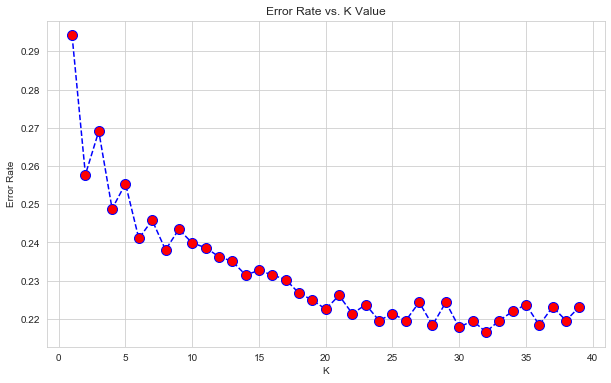

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1233
           1       0.59      0.53      0.56       443

    accuracy                           0.78      1676
   macro avg       0.71      0.70      0.70      1676
weighted avg       0.77      0.78      0.77      1676



In [84]:
#import 

#instantiate

#fit

#predict


In [85]:
#classification report


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1233
           1       0.60      0.48      0.53       443

    accuracy                           0.78      1676
   macro avg       0.71      0.68      0.69      1676
weighted avg       0.76      0.78      0.77      1676



In [80]:
# Now look for the best tuning using gridsearch


In [82]:
#instantiate new RFC

# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
/Users/datascience/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


In [86]:
#classification report


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1233
           1       0.65      0.50      0.57       443

    accuracy                           0.80      1676
   macro avg       0.74      0.70      0.72      1676
weighted avg       0.79      0.80      0.79      1676



## Apply your new model to the new_customer data
How did your predictions change? What is the percentage difference between the two? Were there any other trade-offs? 